Sensor data gathered from wrist

Sitting Accelerometer Data


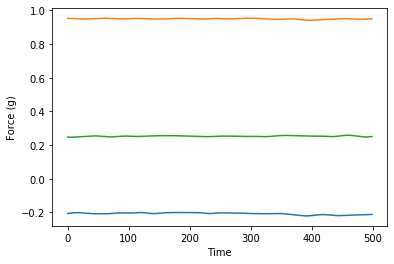

Sitting Gyroscope Data


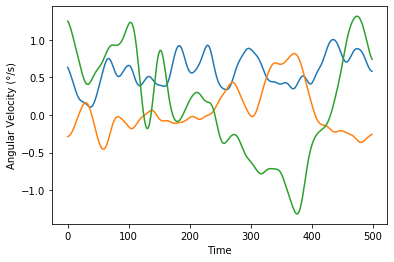

Lying Accelerometer Data


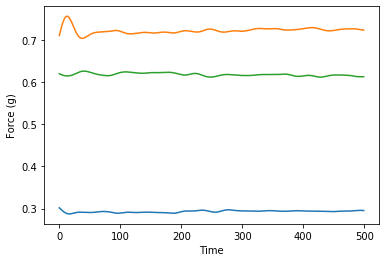

Lying Gyroscope Data


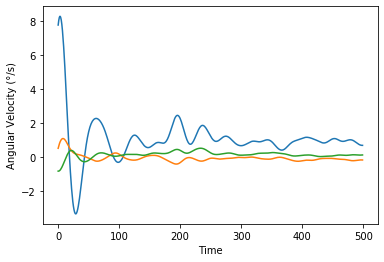

Standing Accelerometer Data


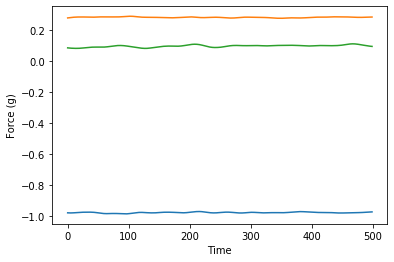

Standing Gyroscope Data


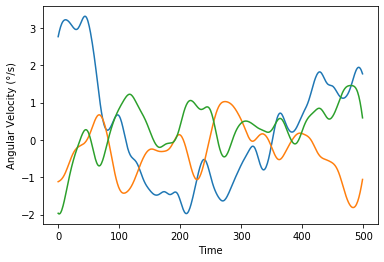

Washing dishes Accelerometer Data


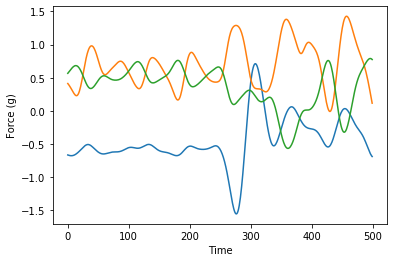

Washing dishes Gyroscope Data


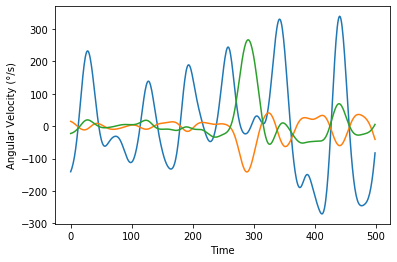

Vacuuming Accelerometer Data


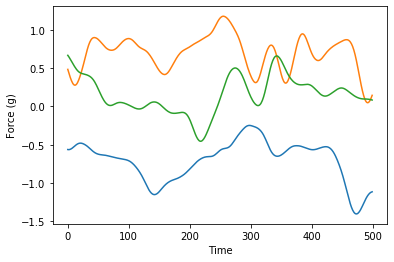

Vacuuming Gyroscope Data


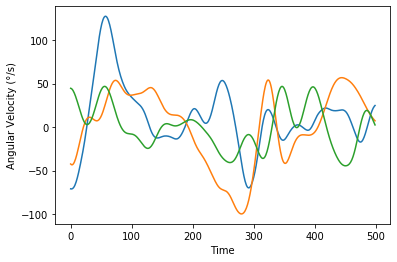

Sweeping Accelerometer Data


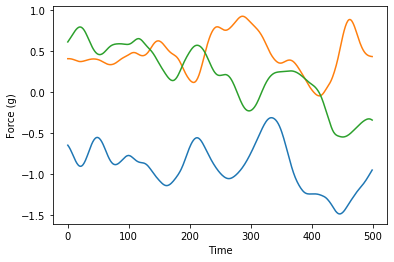

Sweeping Gyroscope Data


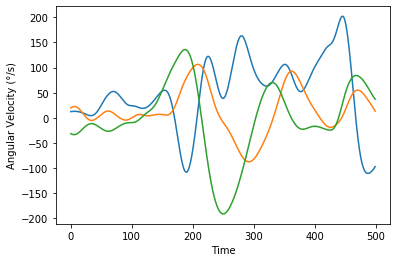

Walking Accelerometer Data


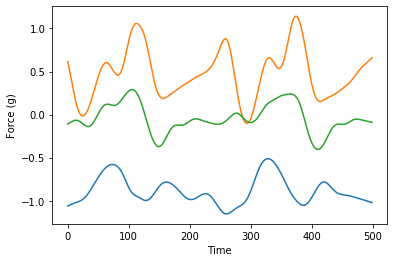

Walking Gyroscope Data


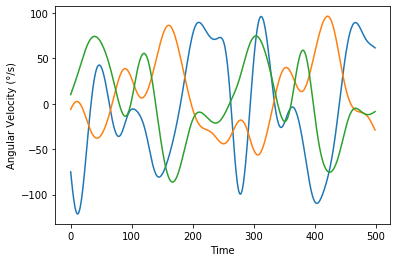

Ascending stairs Accelerometer Data


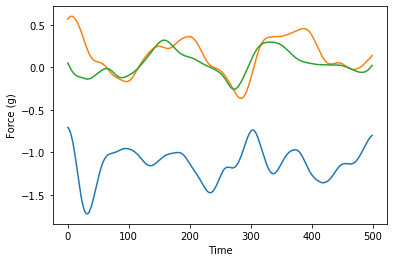

Ascending stairs Gyroscope Data


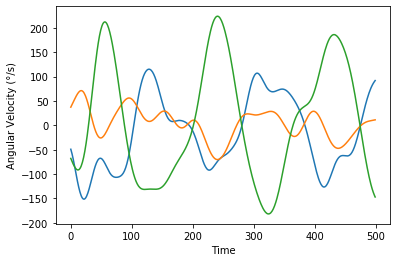

Descending stairs Accelerometer Data


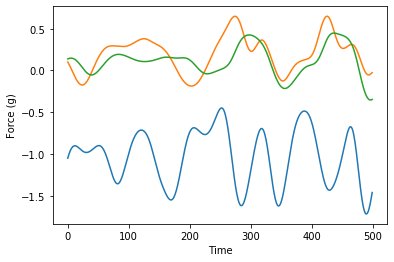

Descending stairs Gyroscope Data


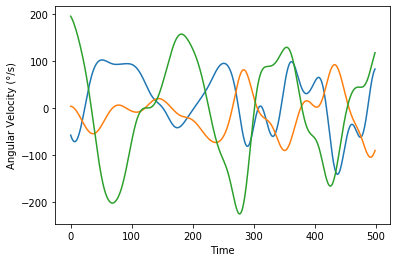

Treadmill running Accelerometer Data


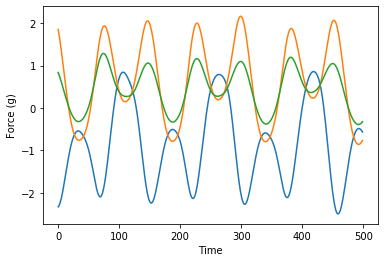

Treadmill running Gyroscope Data


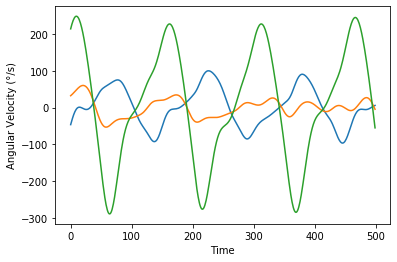

Bicycling (500W) Accelerometer Data


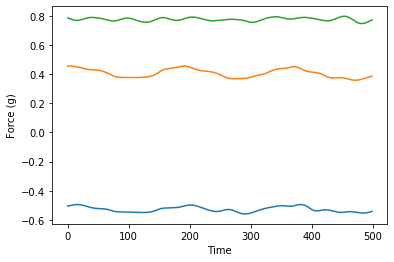

Bicycling (500W) Gyroscope Data


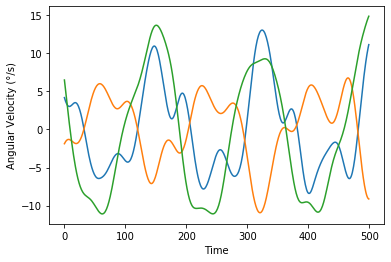

Bicycling (100W) Accelerometer Data


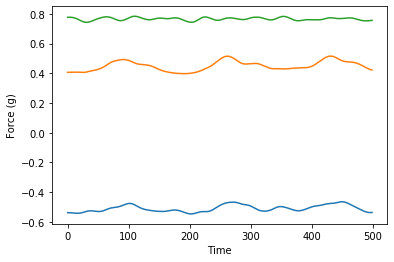

Bicycling (100W) Gyroscope Data


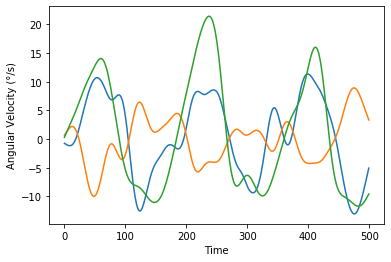

Rope jumping Accelerometer Data


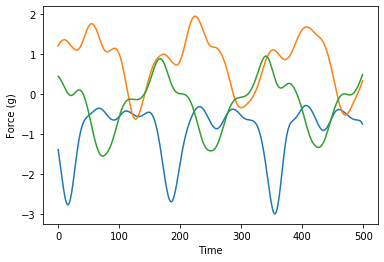

Rope jumping Gyroscope Data


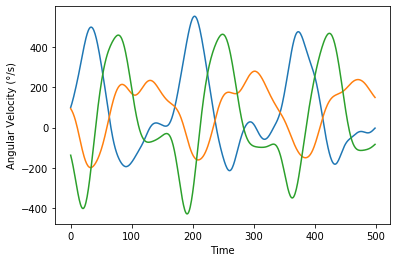

In [13]:
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

activity = ["Sitting", "Lying", "Standing", "Washing dishes", "Vacuuming", "Sweeping", "Walking", "Ascending stairs", "Descending stairs", "Treadmill running", "Bicycling (500W)", "Bicycling (100W)", "Rope jumping"]

# read dataset file
# df = pd.read_csv('dataset/dataset_1.txt', sep=',', header=None)
for file in range(1):
    df = pd.read_csv('dataset/dataset_' + str(file + 1) + '.txt', sep=',', header=None)
    
    """df_sitting = df[df[24] == 1].values
    
    # In this example code, only accelerometer 1 data (column 1 to 3) is used
    plt.plot(df_sitting[:, 0:3])
    plt.show()"""
    
    print("Sensor data gathered from wrist\n")
    
    # 1-14 being the 13 activity labels
    for c in range(1, 14): 
        activity_data = df[df[24] == c].values
        
        b, a = signal.butter(4, 0.04, 'low', analog=False)
        for j in range(24):
            activity_data[:, j] = signal.lfilter(b, a, activity_data[:, j])
        
        # examine acc #1 data (column 1-3)
        print(str(activity[c-1]) + " Accelerometer Data")
        plt.plot(activity_data[500:1000, 0:3])
        plt.xlabel("Time")
        plt.ylabel("Force (g)")
        plt.show()
        
        # examine gyro #1 data (column 3-6)
        print(str(activity[c-1]) + " Gyroscope Data")
        plt.plot(activity_data[500:1000, 3:6])
        plt.xlabel("Time")
        plt.ylabel("Angular Velocity (°/s)")
        plt.show()
